In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error,r2_score, roc_auc_score
from scipy.stats import chi2_contingency

In [3]:
dataframe = pd.read_csv("life_expectancy_data.csv")
dataframe.columns = dataframe.columns.str.strip()
dataframe.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
dataframe = dataframe.replace(" ",np.nan)

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
dataframe.isna().sum()
dataframe = dataframe.dropna()

In [ ]:
dataframe.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
(dataframe.isnull().sum()/dataframe.shape[0]*100).round(2)

Country                             0.00
Year                                0.00
Status                              0.00
Life expectancy                     0.34
Adult Mortality                     0.34
infant deaths                       0.00
Alcohol                             6.60
percentage expenditure              0.00
Hepatitis B                        18.82
Measles                             0.00
BMI                                 1.16
under-five deaths                   0.00
Polio                               0.65
Total expenditure                   7.69
Diphtheria                          0.65
HIV/AIDS                            0.00
GDP                                15.25
Population                         22.19
thinness  1-19 years                1.16
thinness 5-9 years                  1.16
Income composition of resources     5.68
Schooling                           5.55
dtype: float64

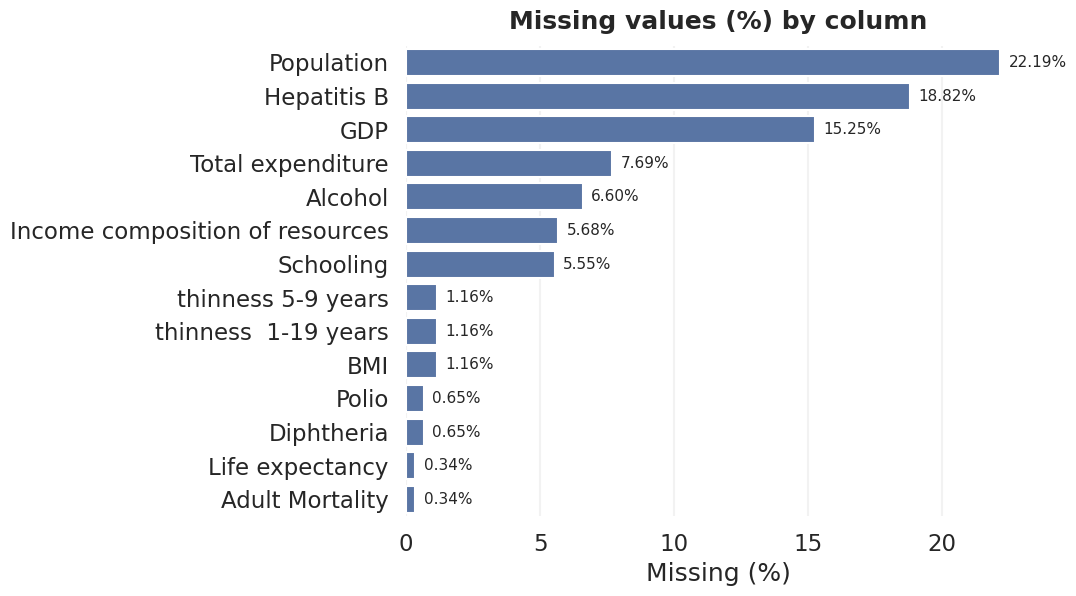

In [ ]:
miss_pct = (dataframe.isnull().mean() * 100).round(2)
miss_pct = miss_pct[miss_pct > 0].sort_values(ascending=False)

plot_df = miss_pct.reset_index()
plot_df.columns = ["column", "missing_%"]

sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(11, max(4.5, 0.45 * len(plot_df))))
ax = sns.barplot(data=plot_df, x="missing_%", y="column", errorbar=None)

ax.set_title("Missing values (%) by column", pad=12, weight="bold")
ax.set_xlabel("Missing (%)")
ax.set_ylabel("")

ax.grid(True, axis="x", alpha=0.25)
ax.grid(False, axis="y")
sns.despine(left=True, bottom=True)

for container in ax.containers:
    ax.bar_label(container, fmt="%S.2f%%", padding=6, fontsize=11)

plt.tight_layout()
plt.show()

count    2.286000e+03
mean     1.275338e+07
std      6.101210e+07
min      3.400000e+01
25%      1.957932e+05
50%      1.386542e+06
75%      7.420359e+06
max      1.293859e+09
Name: Population, dtype: float64


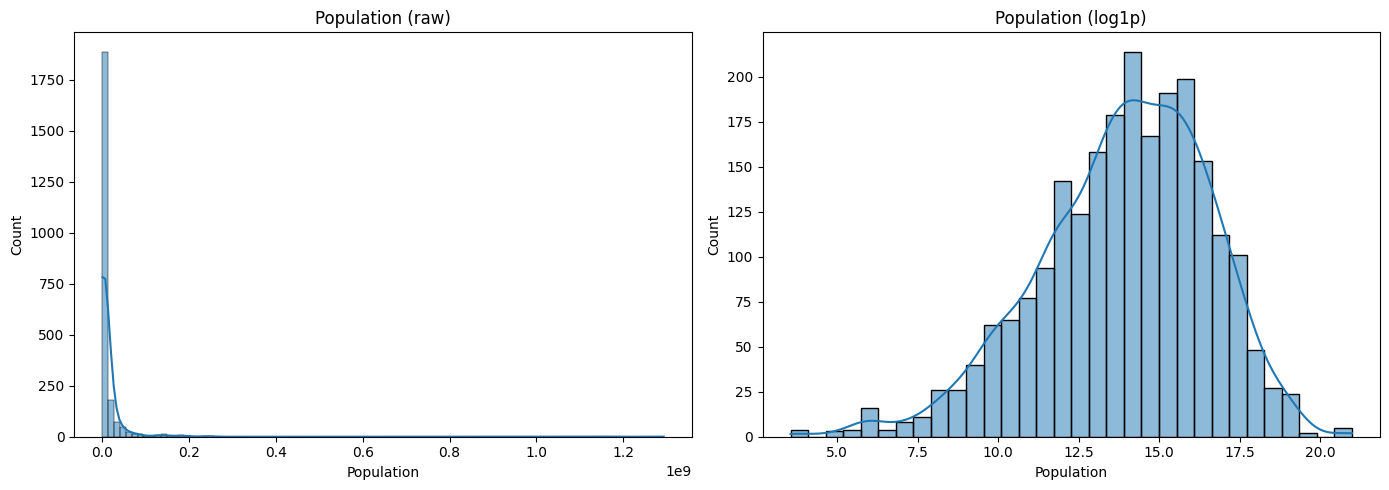

Missing %: 22.19
Status
Developed     18.75
Developing    22.92
Name: Population, dtype: float64


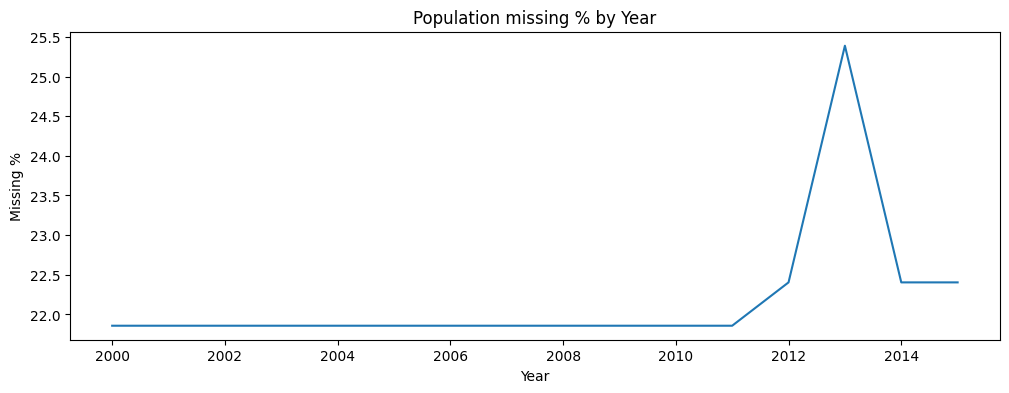

Country
Antigua and Barbuda                      100.0
Dominica                                 100.0
Barbados                                 100.0
Bahrain                                  100.0
Bahamas                                  100.0
Brunei Darussalam                        100.0
Bolivia (Plurinational State of)         100.0
Gambia                                   100.0
Egypt                                    100.0
Democratic Republic of the Congo         100.0
Cuba                                     100.0
Côte d'Ivoire                            100.0
Democratic People's Republic of Korea    100.0
Congo                                    100.0
Czechia                                  100.0
Name: Population, dtype: float64
Population  False  True 
Status                  
Developed     416     96
Developing   1870    556
Chi-square: 4.016280633225984
p-value: 0.045062988230115376
Optimization terminated successfully.
         Current function value: 0.529278
         Itera

In [11]:
col = "Population"
print(dataframe[col].describe())
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(dataframe[col], kde=True, ax=ax[0])
ax[0].set_title("Population (raw)")

sns.histplot(np.log1p(dataframe[col]), kde=True, ax=ax[1])
ax[1].set_title("Population (log1p)")

plt.tight_layout()
plt.show()

m = dataframe[col].isna()
print("Missing %:", round(m.mean()*100, 2))
print(dataframe.groupby("Status")[col].apply(lambda s: s.isna().mean()*100).round(2))

miss_by_year = dataframe.groupby("Year")[col].apply(lambda s: s.isna().mean()*100)
miss_by_year.sort_index().plot(figsize=(12,4), title="Population missing % by Year")
plt.ylabel("Missing %")
plt.show()

miss_by_country = dataframe.groupby("Country")[col].apply(lambda s: s.isna().mean()*100).sort_values(ascending=False)
print(miss_by_country.head(15))

table = pd.crosstab(dataframe["Status"], dataframe["Population"].isna())
print(table)

chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square:", chi2)
print("p-value:", p)

dataframe["Pop_missing"] = dataframe["Population"].isna().astype(int)

model = smf.logit("Pop_missing ~ Year", data=dataframe).fit()
print(model.summary())


features = ["Life expectancy", "Schooling", "Income composition of resources"]
temp = dataframe.copy()

temp["Pop_missing"] = temp["Population"].isna().astype(int)

X = temp[features].fillna(temp[features].median())
y = temp["Pop_missing"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

pred = model.predict_proba(X_test)[:,1]
print("AUC:", roc_auc_score(y_test, pred))

In [8]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [9]:
print(dataframe.duplicated().sum())

0


In [7]:
features =[
    "BMI",
    "Adult Mortality",
    "Total expenditure",
    "HIV/AIDS"
]

target = "Life expectancy"

X = dataframe[features]
y = dataframe[target]

In [8]:
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size = 0.2,random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)

In [9]:
model = LinearRegression()
model.fit(X_train,y_train)

y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

In [10]:
val_mae = mean_absolute_error(y_val,y_val_pred)
val_r2 = r2_score(y_val,y_val_pred)

test_mae = mean_absolute_error(y_test,y_test_pred)
test_r2 = r2_score(y_test,y_test_pred)

In [11]:
print("VAL MAE : ",val_mae)
print("VAL R2",val_r2)

print("TEST MAE : ",test_mae)
print("TEST R2",test_r2)

VAL MAE :  3.8866016163593238
VAL R2 0.6115069597305668
TEST MAE :  3.590124233596964
TEST R2 0.6750884999092841
